In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

x=sp.symbols('x')

f=x**3-6*x**2 + 9*x + 15

In [3]:
sp.pretty_print(f)

 3      2           
x  - 6⋅x  + 9⋅x + 15


In [4]:
f_lambdifie=sp.lambdify(x, f, modules='numpy')
x_vals = np.linspace(-1, 5, 400)
y_vals = f_lambdifie(x_vals)

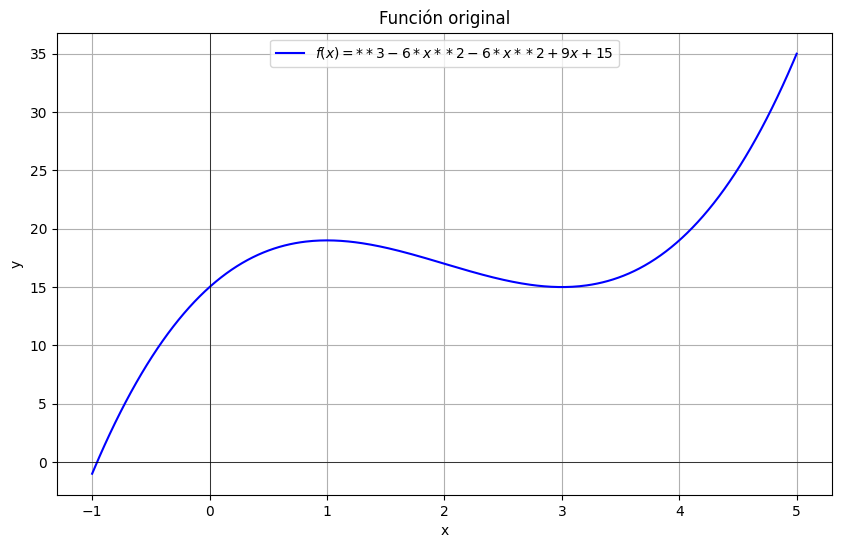

In [6]:
plt.figure(figsize=(10,6))
plt.plot(x_vals,y_vals,label=r'$f(x)=**3 - 6*x**2 - 6*x**2 + 9x+15$', color='blue')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Función original')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
f_prime = sp.diff(f, x)
f_prime_lambdified = sp.lambdify(x, f_prime, modules='numpy')

In [9]:
sp.pretty_print(f_prime)

   2           
3⋅x  - 12⋅x + 9


In [10]:
y_prime_vals=f_prime_lambdified(x_vals)

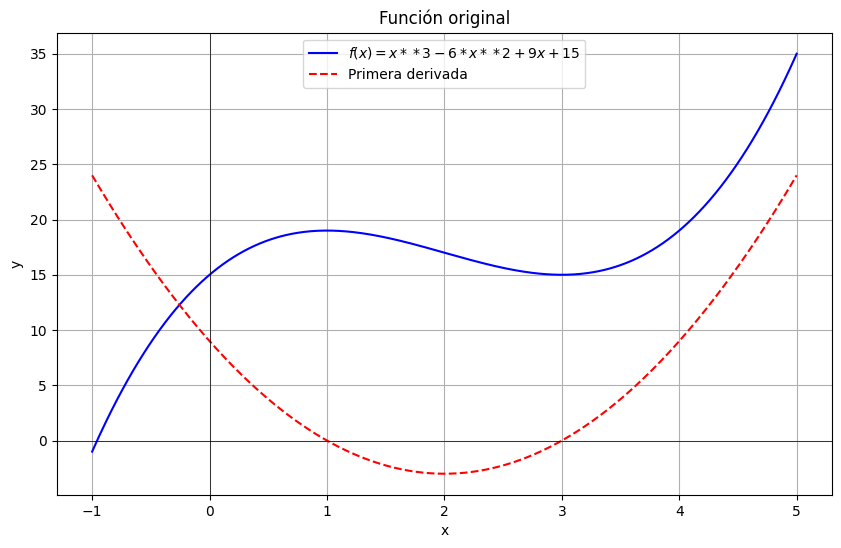

In [12]:
plt.figure(figsize=(10,6))
plt.plot(x_vals,y_vals,label=r'$f(x)=x**3 - 6*x**2 + 9x+15$', color='blue')
plt.plot(x_vals,y_prime_vals,label=r'Primera derivada', color='red', linestyle='--')
plt.title('Función y su primera derivada')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Función original')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
critical_points = sp.solve(f_prime, x)
print("Puntos críticos:", critical_points)

Puntos críticos: [1, 3]


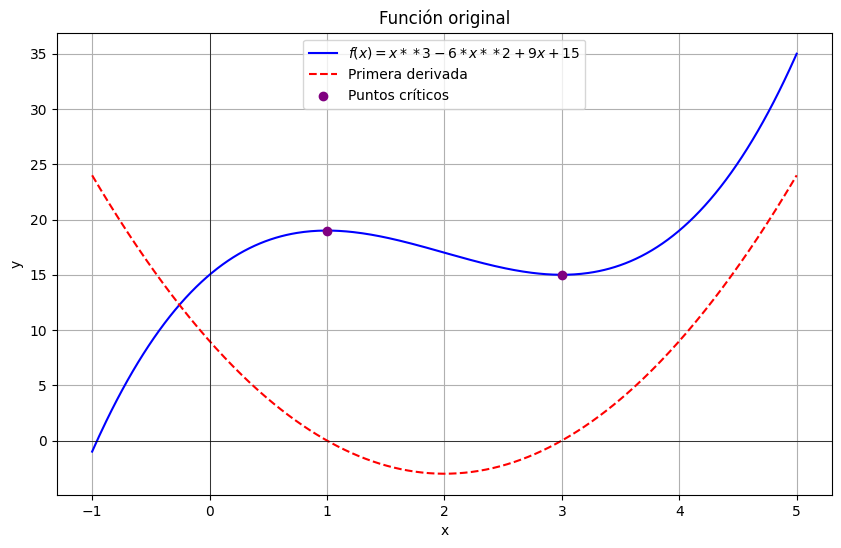

In [14]:
plt.figure(figsize=(10,6))
plt.plot(x_vals,y_vals,label=r'$f(x)=x**3 - 6*x**2 + 9x+15$', color='blue')
plt.plot(x_vals,y_prime_vals,label=r'Primera derivada', color='red', linestyle='--')
plt.title('Función y su primera derivada y puntos críticos')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.scatter(critical_points, [f_lambdifie(cp) for cp in critical_points], color='purple', label='Puntos críticos', zorder=5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Función original')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
f_doubple_prime = sp.diff(f_prime, x)
f_double_prime_lambdified = sp.lambdify(x, f_doubple_prime, modules='numpy')

In [20]:
y_double_prime_vals = f_double_prime_lambdified(x_vals)

In [22]:
inflection_points = sp.solve(f_doubple_prime, x)

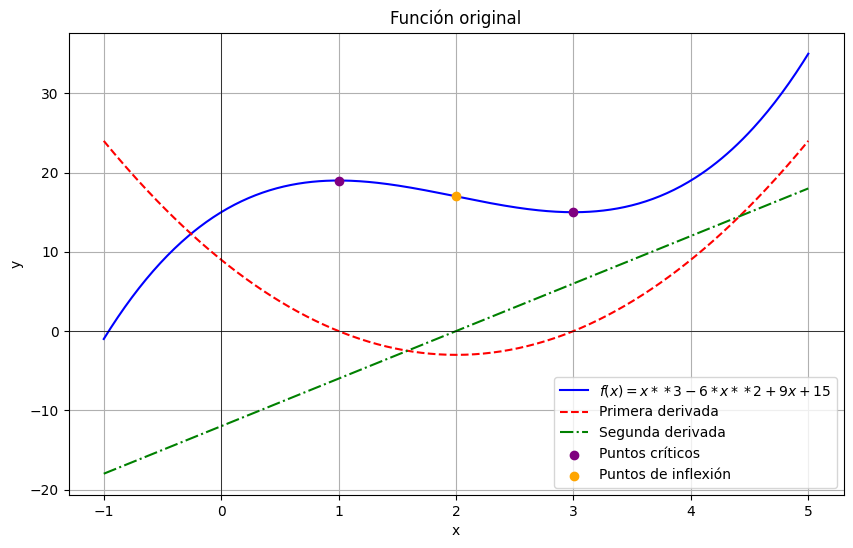

In [24]:
plt.figure(figsize=(10,6))
plt.plot(x_vals,y_vals,label=r'$f(x)=x**3 - 6*x**2 + 9x+15$', color='blue')
plt.plot(x_vals,y_prime_vals,label=r'Primera derivada', color='red', linestyle='--')
plt.plot(x_vals,y_double_prime_vals,label=r'Segunda derivada', color='green', linestyle='-.')
plt.title('Función y su primera derivada y segunda derivada')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.scatter(critical_points, [f_lambdifie(cp) for cp in critical_points], color='purple', label='Puntos críticos', zorder=5)
plt.scatter(inflection_points, [f_lambdifie(ip) for ip in inflection_points], color='orange', label='Puntos de inflexión', zorder=5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Función original')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
print(inflection_points)

[2]


In [30]:
concavidad=[(val,f_double_prime_lambdified(val)) for val in x_vals]
concavidad_up = [c[0] for c in concavidad if c[1]>0]
concavidad_down = [c for c in concavidad if c[1]<0]

print(concavidad_up[:5])
print(concavidad_down[:5])

[np.float64(2.007518796992481), np.float64(2.0225563909774436), np.float64(2.037593984962406), np.float64(2.052631578947368), np.float64(2.0676691729323307)]
[(np.float64(-1.0), np.float64(-18.0)), (np.float64(-0.9849624060150376), np.float64(-17.909774436090224)), (np.float64(-0.9699248120300752), np.float64(-17.81954887218045)), (np.float64(-0.9548872180451128), np.float64(-17.729323308270676)), (np.float64(-0.9398496240601504), np.float64(-17.639097744360903))]
